# Sea surface temperature Canary

Plot the SST in the Canary Current Upwelling System.

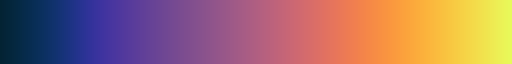

In [1]:
import sys
sys.path.insert(0, '..')
import os
import glob
from filament import filament
import datetime
import netCDF4
import cmocean
import logging
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cartopyticker
reload(filament)
plt.style.use("filament.mplstyle")
cmap = cmocean.cm.thermal
cmap

In [2]:
logger = logging.getLogger("filamentPlot")
logger.setLevel(logging.INFO)
logging.info("Starting")
plotvis = 0

In [9]:
filament.regions

{'mediumdomain': (-19.0, -6.0, 25.0, 35.0),
 'smalldomain': (-15.0, -9.0, 27.0, 33.0),
 'tinydomain': (-12.0, -9.0, 29.5, 32.0),
 'canarydomain': (-19.0, -13.0, 26.0, 30.0),
 'medseadomain': (-2.5, 0.0, 36.0, 37.0),
 'westmed': (-5.0, 10.0, 35.0, 46.0),
 'cretedomain': (23.0, 27.0, 34.0, 36.5),
 'sidedomain': (29.9, 33, 34.9, 37.25),
 'capeblanc': (-22.5, -15.5, 17.5, 23.75),
 'capeghir': (-12.5, -9.25, 29.0, 32),
 'alboran': (-5.6, -2.6, 34.8, 37.54),
 'bergen': (1.5, 6.5, 58, 62.5),
 'galicia': (-12.0, -5.0, 40.5, 46.0),
 'mexico': (-100.0, -90.0, 10.0, 20.0)}

In [18]:
regionname= "Canary"
# regionname= "Mexico"

datadir = f"/home/ctroupin/data/SST/{regionname}/"

figdir = f"../figures/SST/{regionname}/"
visibledir = "/data/Visible/"
datafilelist = sorted(glob.glob(os.path.join(datadir, "*202507*.nc")))

nfiles = len(datafilelist)

logger.info("Processing {} files".format(nfiles))
    
domain = filament.regions["canarydomain"]
myproj = ccrs.Mercator(central_longitude=0.5 * (domain[0] + domain[1]), min_latitude=domain[2], 
                       max_latitude=domain[3])

INFO:filamentPlot:Processing 7 files


In [19]:
if not(os.path.exists(figdir)):
    os.makedirs(figdir)

## Loop on files

In [20]:
for ifile, datafile in enumerate(datafilelist):
    logger.info("Working on {}".format(datafile))
    
    #chloro = filament.Chloro()=
    #chloro.read_from_oceancolorL2(datafile)
    
    
    with netCDF4.Dataset(datafile) as nc:
        proclevel = nc.processing_level
    
    sst = filament.SST()
    
    # Select the reader according to processing level
    if proclevel == "L3 Mapped":
        logger.info("Level-3 data")
        sst.read_from_oceancolorL3(datafile, coordinates)
    elif proclevel == "L2":
        logger.info("Level-2 data")
        sst.read_from_oceancolorL2(datafile)
        sst.field = np.ma.masked_where(sst.qflag > 2, sst.field)    
    titletext = sst.get_title()
    
    sstmin, sstmax = 20, 24.
    
    figname = os.path.join(figdir, sst.get_figname())

    fig = plt.figure(figsize=(12, 10))
    ax = plt.subplot(111, projection=myproj)
    ax.set_extent(domain)
    ax.set_title(titletext, fontsize=24)
    
    
    iii = 0
    #for tlon, tlat in zip(tracklon, tracklat):
    #    iii += 1
    #    ax.text(tlon, tlat, iii, horizontalalignment='center', verticalalignment='center',
    #        fontsize=15)
        
    #vis.add_to_plot(ax, myproj)
    #sst.field[sst.lat.data == -999.] = np.nan
    #sst.field[sst.lon.data == -999.] = np.nan
    #sst.lat[sst.lat.data == -999.] = np.nan
    #sst.lon[sst.lon.data == -999.] = np.nan
    
    #sst.lat = np.ma.masked_equal(sst.lat, -999.0, copy=True)
    #sst.lon = np.ma.masked_equal(sst.lon, -999.0, copy=True)
    pcm = ax.pcolormesh(sst.lon.data, sst.lat.data, sst.field, cmap=cmap, 
                        vmin=sstmin, vmax=sstmax, transform=filament.datacrs)
    
    cb = plt.colorbar(pcm, extend="both", shrink=0.75)
    cb.set_label("°C", rotation=0, ha="left")

    iii = 0        
    #vis.add_to_plot(ax, myproj)

    ax.add_feature(filament.coast_f, linewidth=.2, color=".5")
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=.5, color='.25', linestyle='--', zorder=2)
    gl.top_labels = False
    gl.right_labels = False

    plt.savefig(figname)
    # plt.show()
    plt.close(fig)

INFO:filamentPlot:Working on /home/ctroupin/data/SST/Canary/JPSS1_VIIRS.20250728T015400.L2.SST3.NRT.nc
INFO:filamentPlot:Level-2 data
INFO:filamentPlot:Working on /home/ctroupin/data/SST/Canary/JPSS1_VIIRS.20250728T033601.L2.SST3.NRT.nc
INFO:filamentPlot:Level-2 data
INFO:filamentPlot:Working on /home/ctroupin/data/SST/Canary/SNPP_VIIRS.20250725T023000.L2.SST3.NRT.nc
INFO:filamentPlot:Level-2 data
INFO:filamentPlot:Working on /home/ctroupin/data/SST/Canary/SNPP_VIIRS.20250727T014800.L2.SST3.NRT.nc
INFO:filamentPlot:Level-2 data
INFO:filamentPlot:Working on /home/ctroupin/data/SST/Canary/SNPP_VIIRS.20250727T033001.L2.SST3.NRT.nc
INFO:filamentPlot:Level-2 data
INFO:filamentPlot:Working on /home/ctroupin/data/SST/Canary/SNPP_VIIRS.20250728T031200.L2.SST3.NRT.nc
INFO:filamentPlot:Level-2 data
INFO:filamentPlot:Working on /home/ctroupin/data/SST/Canary/SNPP_VIIRS.20250729T025400.L2.SST3.NRT.nc
INFO:filamentPlot:Level-2 data
